In [1]:
import draw2Svg as dw

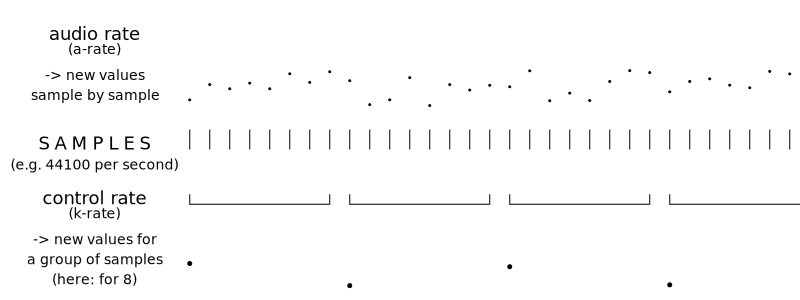

In [49]:
wdth,hght = 800,300
d = dw.Drawing(wdth,hght)

def grid(num,length=800,margin_1=40,margin_2=41):
    """returns a list of num grid values between
    margin_1 and height-margin_2 which are subtracted from length.
    for horizontal, it counts from left to right
    for vertical, it counts from top to bottom"""
    real_length = length - margin_1 - margin_2
    grid_step = real_length / (num-1)
    return [i*grid_step+margin_1 for i in range(num)]

x_grid = grid(5,wdth,0)
x_grid_wdth = x_grid[1] - x_grid[0]
y_grid = grid(5,hght)
y_grid_hght = y_grid[1] - y_grid[0]

normal = 14
large = 18

# middle
 # text
x = x_grid[0] + x_grid_wdth/2
y = y_grid[2]
d.append(dw.Text('SAMPLES',large,x,y,text_anchor='middle',letter_spacing=5))
d.append(dw.Text('(e.g. 44100 per second)',normal,x,y+20,text_anchor='middle'))
 # samples
x = x_grid[1]
spacing = 20
h = 20
x_samples = []
for i in range(32):
    d.append(dw.Line(x,y,x,y-h,stroke='black'))
    x_samples.append(x)
    x += spacing

# top
 # text
x = x_grid[0] + x_grid_wdth/2
y = y_grid[0]
d.append(dw.Text('audio rate',large,x,y,text_anchor='middle'))
d.append(dw.Text('(a-rate)',normal,x,y+normal,text_anchor='middle'))
d.append(dw.Text('-> new values',normal,x,y+40,text_anchor='middle'))
d.append(dw.Text('sample by sample',normal,x,y+60,text_anchor='middle'))
 # samples
from random import random
for x in x_samples:
    rd = random()*y_grid_hght*2/3
    d.append(dw.Circle(x,y+30+rd,1,stroke='black'))

# bottom
 # text
x = x_grid[0] + x_grid_wdth/2
y = y_grid[3]
d.append(dw.Text('control rate',large,x,y,text_anchor='middle'))
d.append(dw.Text('(k-rate)',normal,x,y+normal,text_anchor='middle'))
d.append(dw.Text('-> new values for',normal,x,y+40,text_anchor='middle'))
d.append(dw.Text('a group of samples',normal,x,y+60,text_anchor='middle'))
d.append(dw.Text('(here: for 8)',normal,x,y+80,text_anchor='middle'))
 # grouping brackets
starts = [0,8,16,24]
ends = [7,15,23,31]
h = 10
for s,e in zip(starts,ends):
    d.append(dw.Lines(x_samples[s],y-h, x_samples[s],y, 
                      x_samples[e],y,x_samples[e],y-h,
                      stroke='black',fill='none'))
    rd = random()*y_grid_hght
    d.append(dw.Circle(x_samples[s],y+30+rd,2,stroke='black'))

#d.setPixelScale(1.5)
d.savePng('../../images/01-GS-02-b.png')
d